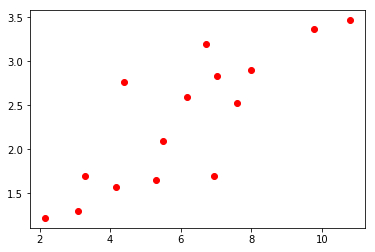

In [3]:
__author__ = 'SherlockLiao'

import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

#print(x_train)
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.show()
#x_train.numpy()

In [4]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

x_train.size()

torch.Size([15, 1])

In [7]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1, bias=True)  # input and output is 1 dimension

    def forward(self, x):
        x = self.linear(x)
        #out = torch.sigmoid(x)
        return x


model = LinearRegression()
# 定义loss和优化函数
criterion = nn.MSELoss()
#criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)
#optimizer = optim.ASGD(model.parameters(), lr=1e-4,t0=2)


D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch[20/1000], loss: 11.109529
Epoch[40/1000], loss: 7.901546
Epoch[60/1000], loss: 5.634321
Epoch[80/1000], loss: 4.031970
Epoch[100/1000], loss: 2.899517
Epoch[120/1000], loss: 2.099161
Epoch[140/1000], loss: 1.533513
Epoch[160/1000], loss: 1.133744
Epoch[180/1000], loss: 0.851209
Epoch[200/1000], loss: 0.651529
Epoch[220/1000], loss: 0.510405
Epoch[240/1000], loss: 0.410667
Epoch[260/1000], loss: 0.340177
Epoch[280/1000], loss: 0.290358
Epoch[300/1000], loss: 0.255148
Epoch[320/1000], loss: 0.230263
Epoch[340/1000], loss: 0.212676
Epoch[360/1000], loss: 0.200245
Epoch[380/1000], loss: 0.191460
Epoch[400/1000], loss: 0.185250
Epoch[420/1000], loss: 0.180862
Epoch[440/1000], loss: 0.177759
Epoch[460/1000], loss: 0.175566
Epoch[480/1000], loss: 0.174016
Epoch[500/1000], loss: 0.172920
Epoch[520/1000], loss: 0.172145
Epoch[540/1000], loss: 0.171597
Epoch[560/1000], loss: 0.171209
Epoch[580/1000], loss: 0.170935
Epoch[600/1000], loss: 0.170740
Epoch[620/1000], loss: 0.170602
Epoch[640/1

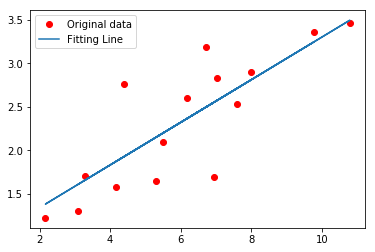

In [8]:
# 开始训练
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))
        """
        model.eval()
        predict1 = model(Variable(x_train))
        predict1 = predict1.data.numpy()
        w = (predict1[1] -  predict1[2]) / (x_train.numpy()[1] - x_train.numpy()[2])
        b = predict1[1] - w *  x_train.numpy()[1]
        print('w is {}, b is {}'
              .format(w, b))
        """        

model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()

plt.plot(x_train.numpy(), y_train.numpy(),'ro',  label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')

#plt.plot(x_train, y_train, 'ro', label='Original data')
#plt.plot(x_train, predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()

# 保存模型
torch.save(model.state_dict(), './linear.pth')

In [159]:
print(model.parameters())

<generator object Module.parameters at 0x00000208C34D1B48>


In [153]:
print('the output of model is : \n ', predict)

the output of model is : 
  [[0.8277257]
 [1.347719 ]
 [1.867712 ]
 [2.4397047]
 [2.543703 ]
 [1.2380476]
 [3.8904855]
 [2.1901078]
 [2.8556993]
 [0.2921328]
 [2.596648 ]
 [4.3688793]
 [1.7793133]
 [3.0480967]
 [0.7331814]]


In [118]:
predict = torch.from_numpy(predict)

In [119]:
predict.size()

torch.Size([15, 1])

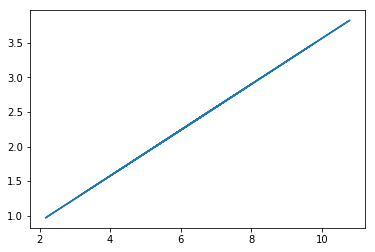

In [123]:
plt.plot(x_train.numpy(), predict, label='Fitting Line')

In [124]:
x_train

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [131]:
x_train.numpy()[1]

array([4.4], dtype=float32)

In [130]:
predict[1]

array([1.7083275], dtype=float32)

In [132]:
w = (predict[1] -  predict[2])/ (x_train.numpy()[1] - x_train.numpy()[2])
w

array([0.33151066], dtype=float32)

In [133]:
w = (predict[3] -  predict[2])/ (x_train.numpy()[3] - x_train.numpy()[2])
w

array([0.3315104], dtype=float32)

In [134]:
b = predict[1] - w *  x_train.numpy()[1]

In [135]:
b

array([0.24968171], dtype=float32)

In [136]:
b = predict[2] - w *  x_train.numpy()[2]
b

array([0.24968207], dtype=float32)

In [156]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import utils as nn_utils

m = nn.Linear(20, 30)
input = torch.autograd.Variable(torch.randn(128, 20))
output = m(input)
print(output.size())

torch.Size([128, 30])


In [157]:
output

tensor([[-0.4942, -0.2277,  0.3337,  ...,  0.6595, -0.3534, -0.0037],
        [ 0.5027,  0.5559, -0.0070,  ..., -1.1811,  0.6245, -0.9241],
        [-0.3867,  0.5731,  0.8435,  ..., -0.0180, -0.0306, -0.2905],
        ...,
        [ 0.7291, -0.6323, -0.0140,  ..., -0.0288, -1.0081,  0.4171],
        [ 0.5495,  0.2500, -0.9335,  ..., -0.3244,  0.1175, -0.1612],
        [ 1.0201, -1.1333, -0.9755,  ..., -0.1990,  1.0307, -0.9102]],
       grad_fn=<ThAddmmBackward>)